In [ ]:
#!pip install nolds
#!pip install pyEDM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import brute, minimize
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import kruskal
#from hurst import compute_Hc
import nolds
import math
#import pyEDM

##Exploratório

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/GuiMendeees/UFMG/master/Monografia%20I/World_Development_Indicators.csv'
  ,encoding = 'latin'
  ,sep = ';')

In [ ]:
df1.head(10)

,ANO,COD_PAIS,%CRESCIMENTO_PIB_PER_CAPITA
0,1960,BRA,NaN
1,1960,USA,NaN
2,1961,BRA,NaN
3,1961,USA,NaN
4,1962,BRA,NaN
5,1962,USA,NaN
6,1963,BRA,NaN
7,1963,USA,NaN
8,1964,BRA,NaN
9,1964,USA,NaN


In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/GuiMendeees/UFMG/master/Monografia%20I/Health_Nutrition_and_Population_Statistics.csv'
  ,encoding = 'latin'
  ,sep = ';')

In [ ]:
df2.head(10)

,ANO,COD_PAIS,TX_NATALIDADE_PER_MIL,%GASTO_PIB_SAUDE,TX_MORTALIDADE_PER_MIL,TX_FERTILIDADE_PER_MULHER,EXP_VIDA,DELTA_MIGRACAO,POP_TOTAL
0,1960,BRA,43.860,NaN,14.025,6.061,52.660000,51401.0,73092515
1,1960,USA,23.700,NaN,9.500,3.654,69.770732,583458.0,180671000
2,1961,BRA,43.431,NaN,13.662,6.044,53.183000,369.0,75330008
3,1961,USA,23.300,NaN,9.300,3.620,70.270732,541424.0,183691000
4,1962,BRA,42.844,NaN,13.301,5.995,53.710000,2383.0,77599218
5,1962,USA,22.400,NaN,9.500,3.461,70.119512,549734.0,186538000
6,1963,BRA,42.176,NaN,12.952,5.929,54.209000,1837.0,79915555
7,1963,USA,21.700,NaN,9.600,3.319,69.917073,588381.0,189242000
8,1964,BRA,41.238,NaN,12.621,5.818,54.648000,2787.0,82262794
9,1964,USA,21.100,NaN,9.400,3.190,70.165854,501115.0,191889000


In [ ]:
dfPopulacao = df1.merge(df2, how = 'inner', on = ['ANO','COD_PAIS'])
dfPopulacao.sample(10)

,ANO,COD_PAIS,%CRESCIMENTO_PIB_PER_CAPITA,TX_NATALIDADE_PER_MIL,%GASTO_PIB_SAUDE,TX_MORTALIDADE_PER_MIL,TX_FERTILIDADE_PER_MULHER,EXP_VIDA,DELTA_MIGRACAO,POP_TOTAL
84,2002,BRA,1.518435,18.574,0.717361,6.329,2.1030,70.410000,6018.0,180476685
38,1979,BRA,2.662170,32.461,NaN,8.989,4.1200,61.253000,8024.0,119447303
112,2016,BRA,-4.089594,14.051,0.317217,6.538,1.7090,74.442000,82589.0,206859578
117,2018,USA,1.833050,11.600,0.662551,8.678,1.7295,78.639024,1200796.0,326838199
87,2003,USA,0.223323,14.100,0.643306,8.400,2.0475,77.036585,1074728.0,290107933
36,1978,BRA,0.515137,32.741,NaN,9.203,4.1950,60.720000,7653.0,116664382
76,1998,BRA,-2.492801,21.060,NaN,6.429,2.4090,69.189000,-22409.0,171039804
120,2020,BRA,-4.841285,13.078,NaN,7.420,1.6490,74.009000,56880.0,213196304
89,2004,USA,2.977066,14.000,0.641502,8.200,2.0515,77.487805,1200409.0,292805298
70,1995,BRA,4.381593,22.319,NaN,6.685,2.5790,67.919000,-26337.0,163515328


In [ ]:
dfPopulacaoBrasil = dfPopulacao.loc[dfPopulacao['COD_PAIS'] == 'BRA']
dfPopulacaoBrasil.sample(10)

,ANO,COD_PAIS,%CRESCIMENTO_PIB_PER_CAPITA,TX_NATALIDADE_PER_MIL,%GASTO_PIB_SAUDE,TX_MORTALIDADE_PER_MIL,TX_FERTILIDADE_PER_MULHER,EXP_VIDA,DELTA_MIGRACAO,POP_TOTAL
66,1993,BRA,2.277014,23.022,NaN,6.855,2.672,67.109,-21956.0,158440875
104,2012,BRA,0.805208,14.939,0.305664,6.340,1.767,73.552,43451.0,199977707
80,2000,BRA,4.310205,19.841,0.640319,6.399,2.255,69.737,-1761.0,175873720
56,1988,BRA,-1.649873,26.420,NaN,7.310,3.112,65.454,-11309.0,145253973
2,1961,BRA,NaN,43.431,NaN,13.662,6.044,53.183,369.0,75330008
76,1998,BRA,-2.492801,21.060,NaN,6.429,2.409,69.189,-22409.0,171039804
52,1986,BRA,7.358371,28.090,NaN,7.615,3.342,64.640,-24426.0,139643355
14,1967,BRA,NaN,37.882,NaN,11.660,5.368,55.868,-268.0,89323288
28,1974,BRA,3.505249,33.619,NaN,9.954,4.502,58.881,-6487.0,106167372
86,2003,BRA,-0.180566,17.850,0.532379,6.313,2.023,70.720,-16908.0,182629278


In [ ]:
dfPopulacaoBrasil.isnull().sum()

ANO                             0
COD_PAIS                        0
%CRESCIMENTO_PIB_PER_CAPITA    12
TX_NATALIDADE_PER_MIL           1
%GASTO_PIB_SAUDE               42
TX_MORTALIDADE_PER_MIL          1
TX_FERTILIDADE_PER_MULHER       1
EXP_VIDA                        1
DELTA_MIGRACAO                  1
POP_TOTAL                       0
dtype: int64

In [ ]:
dfPopulacaoEUA = dfPopulacao.loc[dfPopulacao['COD_PAIS'] == 'USA']
dfPopulacaoEUA.sample(10)

,ANO,COD_PAIS,%CRESCIMENTO_PIB_PER_CAPITA,TX_NATALIDADE_PER_MIL,%GASTO_PIB_SAUDE,TX_MORTALIDADE_PER_MIL,TX_FERTILIDADE_PER_MULHER,EXP_VIDA,DELTA_MIGRACAO,POP_TOTAL
119,2019,USA,1.638044,11.4,0.677035,8.700,1.7060,78.787805,1158444.0,328329953
67,1993,USA,0.693391,15.4,NaN,8.800,2.0195,75.419512,1752153.0,259919000
9,1964,USA,NaN,21.1,NaN,9.400,3.1900,70.165854,501115.0,191889000
97,2008,USA,-4.039320,14.0,0.761181,8.100,2.0720,78.039024,1095864.0,304093966
69,1994,USA,3.331105,15.0,NaN,8.800,2.0015,75.619512,1806698.0,263126000
55,1987,USA,2.729879,15.7,NaN,8.600,1.8720,74.765854,677547.0,242289000
123,2021,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331893745
23,1971,USA,1.562887,17.2,NaN,9.300,2.2660,71.107317,914163.0,207661000
107,2013,USA,0.577815,12.4,0.693616,8.215,1.8575,78.741463,1320840.0,316059947
95,2007,USA,-0.539328,14.3,0.717116,8.000,2.1200,77.987805,1108509.0,301231207


In [ ]:
dfPopulacaoEUA.isnull().sum()

ANO                             0
COD_PAIS                        0
%CRESCIMENTO_PIB_PER_CAPITA    12
TX_NATALIDADE_PER_MIL           1
%GASTO_PIB_SAUDE               42
TX_MORTALIDADE_PER_MIL          1
TX_FERTILIDADE_PER_MULHER       1
EXP_VIDA                        1
DELTA_MIGRACAO                  1
POP_TOTAL                       0
dtype: int64

Devido ao fato de bastante similaridade em torno de dados faltantes escolhido o dataset do Brasil

In [ ]:
dfPopulacaoBrasil.dtypes

ANO                              int64
COD_PAIS                        object
%CRESCIMENTO_PIB_PER_CAPITA    float64
TX_NATALIDADE_PER_MIL          float64
%GASTO_PIB_SAUDE               float64
TX_MORTALIDADE_PER_MIL         float64
TX_FERTILIDADE_PER_MULHER      float64
EXP_VIDA                       float64
DELTA_MIGRACAO                 float64
POP_TOTAL                        int64
dtype: object

In [ ]:
dfPopulacaoBrasil.iloc[:, 2:10] = dfPopulacaoBrasil.iloc[:, 2:10].astype(float)

<ipython-input-19-1d815536a9c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPopulacaoBrasil.iloc[:, 2:10] = dfPopulacaoBrasil.iloc[:, 2:10].astype(float)
<ipython-input-19-1d815536a9c9>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dfPopulacaoBrasil.iloc[:, 2:10] = dfPopulacaoBrasil.iloc[:, 2:10].astype(float)


In [ ]:
dfPopulacaoBrasil.dtypes

ANO                              int64
COD_PAIS                        object
%CRESCIMENTO_PIB_PER_CAPITA    float64
TX_NATALIDADE_PER_MIL          float64
%GASTO_PIB_SAUDE               float64
TX_MORTALIDADE_PER_MIL         float64
TX_FERTILIDADE_PER_MULHER      float64
EXP_VIDA                       float64
DELTA_MIGRACAO                 float64
POP_TOTAL                      float64
dtype: object

In [ ]:
dfPopulacaoBrasil.describe()

,ANO,%CRESCIMENTO_PIB_PER_CAPITA,TX_NATALIDADE_PER_MIL,%GASTO_PIB_SAUDE,TX_MORTALIDADE_PER_MIL,TX_FERTILIDADE_PER_MULHER,EXP_VIDA,DELTA_MIGRACAO,POP_TOTAL
count,62.000000,50.000000,61.000000,20.000000,61.000000,61.000000,61.000000,61.000000,6.200000e+01
mean,1990.500000,1.597727,26.113672,0.507238,8.257541,3.316836,65.354262,-240.245902,1.485603e+08
std,18.041619,5.758357,9.345296,0.221336,2.317852,1.432045,6.937444,27655.109089,4.411295e+07
min,1960.000000,-15.010229,13.078000,0.253515,6.106000,1.649000,52.660000,-42926.000000,7.309252e+07
25%,1975.250000,-0.753308,17.335000,0.302195,6.399000,1.974000,59.353000,-20270.000000,1.093470e+08
50%,1990.500000,1.438642,24.844000,0.452694,7.165000,2.905000,65.985000,-5390.000000,1.520214e+08
75%,2005.750000,4.191592,33.366000,0.708139,9.744000,4.415000,71.753000,7653.000000,1.883148e+08
max,2021.000000,23.892530,43.860000,0.841212,14.025000,6.061000,75.338000,82589.000000,2.143262e+08


Faixas de valores sugerem a necessidade de normalização dos dados

<ipython-input-22-d855c952a965>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = dfPopulacaoBrasil, x = '%CRESCIMENTO_PIB_PER_CAPITA', palette = 'mako',ax = axs[0,0])
<ipython-input-22-d855c952a965>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = dfPopulacaoBrasil, x = 'TX_NATALIDADE_PER_MIL', palette = 'mako',ax = axs[0,1])
<ipython-input-22-d855c952a965>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = dfPopulacaoBrasil, x = '%GASTO_PIB_SAUDE', palette = 'mako',ax = axs[0,2])
<ipython-input-22-d855c952a965>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = dfPopulacaoBrasil, x = 'TX_MORTALIDADE_PER_MIL', palette = 'mako',ax = axs[1,0])
<ipython-input-22-d855c952a965>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = dfPopula

<Axes: xlabel='DELTA_MIGRACAO', ylabel='Count'>

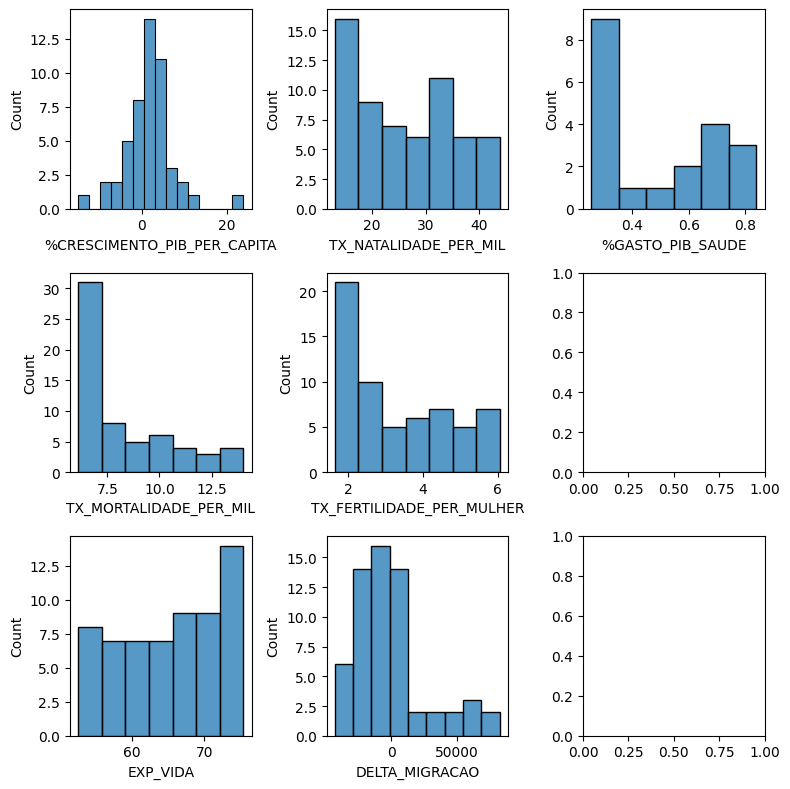

In [ ]:
fig, axs = plt.subplots(3,3, figsize = (8,8),tight_layout = True)


sns.histplot(data = dfPopulacaoBrasil, x = '%CRESCIMENTO_PIB_PER_CAPITA', palette = 'mako',ax = axs[0,0])
sns.histplot(data = dfPopulacaoBrasil, x = 'TX_NATALIDADE_PER_MIL', palette = 'mako',ax = axs[0,1])
sns.histplot(data = dfPopulacaoBrasil, x = '%GASTO_PIB_SAUDE', palette = 'mako',ax = axs[0,2])
sns.histplot(data = dfPopulacaoBrasil, x = 'TX_MORTALIDADE_PER_MIL', palette = 'mako',ax = axs[1,0])
sns.histplot(data = dfPopulacaoBrasil, x = 'TX_FERTILIDADE_PER_MULHER', palette = 'mako',ax = axs[1,1])
sns.histplot(data = dfPopulacaoBrasil, x = 'EXP_VIDA', palette = 'mako',ax = axs[2,0])
sns.histplot(data = dfPopulacaoBrasil, x = 'DELTA_MIGRACAO', palette = 'mako',ax = axs[2,1])

Para as colunas que necessitam de tratamento por valores faltantes utilizada a mediana como medida de substituição uma vez que, de modo geral, a distribuição dos dados não se parece com a normal

In [ ]:
dfPopulacaoBrasil = dfPopulacaoBrasil.fillna(dfPopulacaoBrasil.median())

<ipython-input-23-3f6220e46697>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfPopulacaoBrasil = dfPopulacaoBrasil.fillna(dfPopulacaoBrasil.median())


In [ ]:
dfPopulacaoBrasil.sample(10)

,ANO,COD_PAIS,%CRESCIMENTO_PIB_PER_CAPITA,TX_NATALIDADE_PER_MIL,%GASTO_PIB_SAUDE,TX_MORTALIDADE_PER_MIL,TX_FERTILIDADE_PER_MULHER,EXP_VIDA,DELTA_MIGRACAO,POP_TOTAL
64,1992,BRA,-0.322795,23.376,0.452694,6.951,2.719,66.708,-20270.0,155900790.0
36,1978,BRA,0.515137,32.741,0.452694,9.203,4.195,60.720,7653.0,116664382.0
104,2012,BRA,0.805208,14.939,0.305664,6.340,1.767,73.552,43451.0,199977707.0
66,1993,BRA,2.277014,23.022,0.452694,6.855,2.672,67.109,-21956.0,158440875.0
52,1986,BRA,7.358371,28.090,0.452694,7.615,3.342,64.640,-24426.0,139643355.0
32,1976,BRA,8.273145,33.173,0.452694,9.568,4.339,59.792,-15633.0,111286504.0
86,2003,BRA,-0.180566,17.850,0.532379,6.313,2.023,70.720,-16908.0,182629278.0
62,1991,BRA,1.087003,24.148,0.452694,7.068,2.815,66.310,-30659.0,153336445.0
38,1979,BRA,2.662170,32.461,0.452694,8.989,4.120,61.253,8024.0,119447303.0
122,2021,BRA,1.438642,24.844,0.452694,7.165,2.905,65.985,-5390.0,214326223.0


In [ ]:
dfPopulacaoBrasil.isnull().sum()

ANO                            0
COD_PAIS                       0
%CRESCIMENTO_PIB_PER_CAPITA    0
TX_NATALIDADE_PER_MIL          0
%GASTO_PIB_SAUDE               0
TX_MORTALIDADE_PER_MIL         0
TX_FERTILIDADE_PER_MULHER      0
EXP_VIDA                       0
DELTA_MIGRACAO                 0
POP_TOTAL                      0
dtype: int64

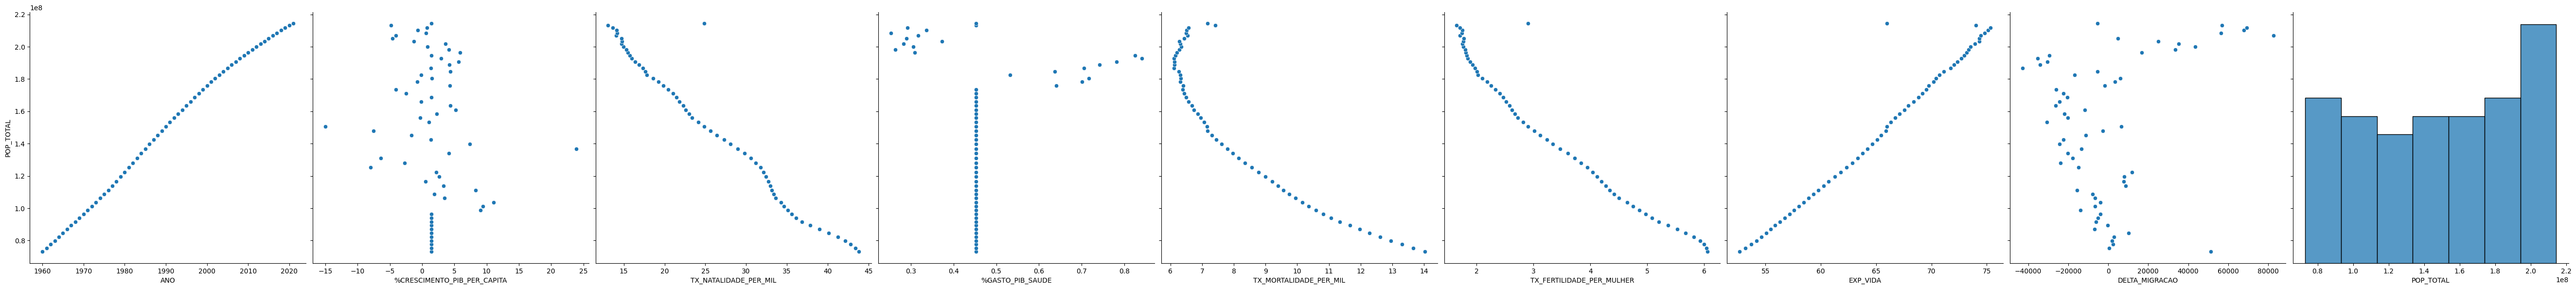

In [ ]:
sns.pairplot(data=dfPopulacaoBrasil, x_vars=['ANO','%CRESCIMENTO_PIB_PER_CAPITA','TX_NATALIDADE_PER_MIL','%GASTO_PIB_SAUDE','TX_MORTALIDADE_PER_MIL',
 'TX_FERTILIDADE_PER_MULHER','EXP_VIDA','DELTA_MIGRACAO','POP_TOTAL'], y_vars=['POP_TOTAL'], height=6)
plt.show()

<ipython-input-27-ef7cdf326d1f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfPopulacaoBrasil.corr(),


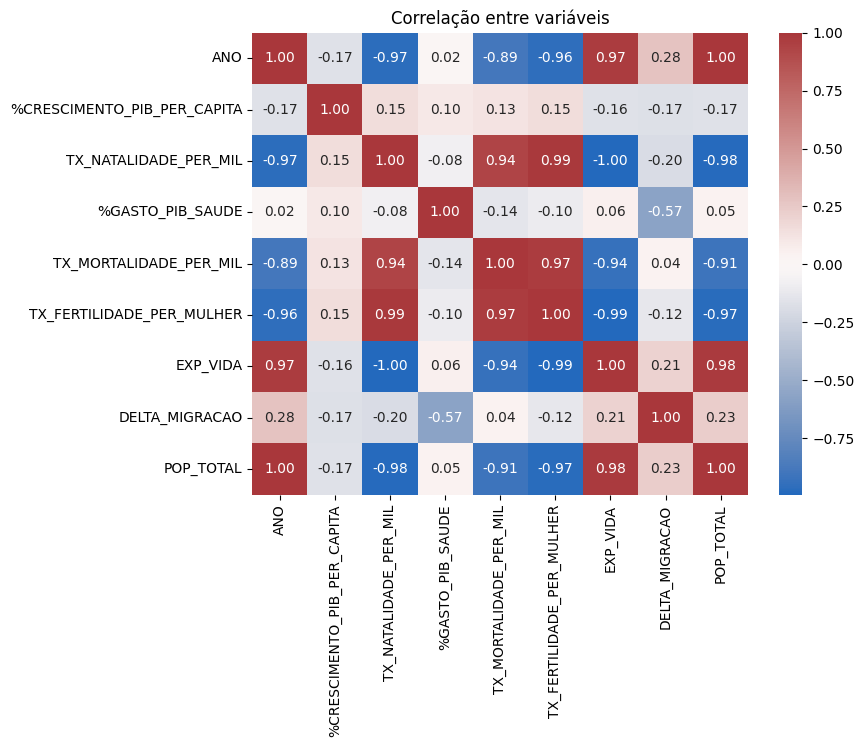

In [ ]:
plt.subplots(figsize = (8,6))
sns.heatmap(
    dfPopulacaoBrasil.corr(),
    annot = True,
    fmt = '.2f',
    cmap='vlag')

plt.title('Correlação entre variáveis')
plt.show()
figsize = (6.4,4.8)

Observa-se que há uma correlação forte e direta entre a expectativa de vida e o tamanho da população e uma correlação mais fraca e direta com o delta de migração, observa-se tambem uma correlação inversa com atributos que intuitivamente impactam na população como as taxas de mortalidade, fecundidade e natalidade, no entanto isto não representa caráter causal.

##PCA

###Normalização dos dados

In [ ]:
dfPopulacaoBrasil = dfPopulacaoBrasil.drop('COD_PAIS', axis=1)

In [ ]:
dfPopulacaoBrasil = dfPopulacaoBrasil.reset_index(drop = True)

In [ ]:
dfPopulacaoBrasil.head(5)

,ANO,%CRESCIMENTO_PIB_PER_CAPITA,TX_NATALIDADE_PER_MIL,%GASTO_PIB_SAUDE,TX_MORTALIDADE_PER_MIL,TX_FERTILIDADE_PER_MULHER,EXP_VIDA,DELTA_MIGRACAO,POP_TOTAL
0,1960,1.438642,43.860,0.452694,14.025,6.061,52.660,51401.0,73092515.0
1,1961,1.438642,43.431,0.452694,13.662,6.044,53.183,369.0,75330008.0
2,1962,1.438642,42.844,0.452694,13.301,5.995,53.710,2383.0,77599218.0
3,1963,1.438642,42.176,0.452694,12.952,5.929,54.209,1837.0,79915555.0
4,1964,1.438642,41.238,0.452694,12.621,5.818,54.648,2787.0,82262794.0


In [ ]:
cols = dfPopulacaoBrasil.columns.to_list()
cols

['ANO',
 '%CRESCIMENTO_PIB_PER_CAPITA',
 'TX_NATALIDADE_PER_MIL',
 '%GASTO_PIB_SAUDE',
 'TX_MORTALIDADE_PER_MIL',
 'TX_FERTILIDADE_PER_MULHER',
 'EXP_VIDA',
 'DELTA_MIGRACAO',
 'POP_TOTAL']

In [ ]:
scaler = StandardScaler()
dfNormalizado =  scaler.fit_transform(dfPopulacaoBrasil)

In [ ]:
dfNormalizado = pd.DataFrame(dfNormalizado, columns = cols)
dfNormalizado.head(5)

,ANO,%CRESCIMENTO_PIB_PER_CAPITA,TX_NATALIDADE_PER_MIL,%GASTO_PIB_SAUDE,TX_MORTALIDADE_PER_MIL,TX_FERTILIDADE_PER_MULHER,EXP_VIDA,DELTA_MIGRACAO,POP_TOTAL
0,-1.704336,-0.02506,1.932283,-0.140587,2.532528,1.951324,-1.861430,1.900711,-1.724752
1,-1.648456,-0.02506,1.885626,-0.140587,2.373618,1.939264,-1.784801,0.025440,-1.673616
2,-1.592576,-0.02506,1.821785,-0.140587,2.215584,1.904506,-1.707586,0.099449,-1.621755
3,-1.536697,-0.02506,1.749135,-0.140587,2.062802,1.857688,-1.634473,0.079385,-1.568818
4,-1.480817,-0.02506,1.647120,-0.140587,1.917901,1.778948,-1.570152,0.114294,-1.515173


In [ ]:
# seleção dos atributos relevantes
X = dfNormalizado.iloc[:,1:8]
y = dfNormalizado.iloc[:,8]

In [ ]:
X[:5]

,%CRESCIMENTO_PIB_PER_CAPITA,TX_NATALIDADE_PER_MIL,%GASTO_PIB_SAUDE,TX_MORTALIDADE_PER_MIL,TX_FERTILIDADE_PER_MULHER,EXP_VIDA,DELTA_MIGRACAO
0,-0.02506,1.932283,-0.140587,2.532528,1.951324,-1.861430,1.900711
1,-0.02506,1.885626,-0.140587,2.373618,1.939264,-1.784801,0.025440
2,-0.02506,1.821785,-0.140587,2.215584,1.904506,-1.707586,0.099449
3,-0.02506,1.749135,-0.140587,2.062802,1.857688,-1.634473,0.079385
4,-0.02506,1.647120,-0.140587,1.917901,1.778948,-1.570152,0.114294


In [ ]:
y[:5]

0   -1.724752
1   -1.673616
2   -1.621755
3   -1.568818
4   -1.515173
Name: POP_TOTAL, dtype: float64

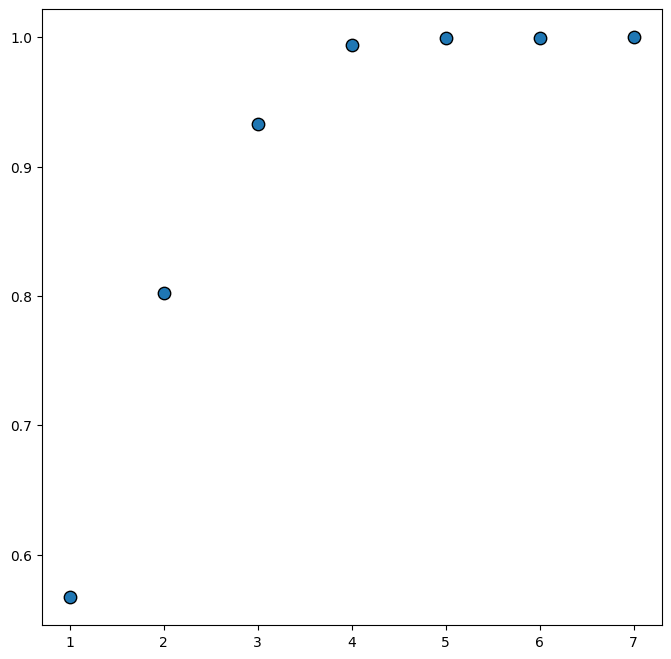

In [ ]:
plt.rcParams['figure.figsize']  = (8, 8)
components = list(range(1, len(cols)-1))
pcavar = []
for k in components:
    pca = PCA(n_components=k)
    pca = pca.fit(X)
    pcavar.append(pca.explained_variance_ratio_.sum())
plt.xticks(np.arange(1, X.shape[1]+1))
plt.scatter(components, pcavar, s=80, edgecolors='k')

plt.rcParams['figure.figsize']  = (6.4, 4.8)

In [ ]:
explained_variance = pca.explained_variance_ratio_
np.set_printoptions(suppress=True)
explained_variance

array([0.56699591, 0.23528024, 0.13089692, 0.06090356, 0.00510528,
       0.00061288, 0.00020521])

In [ ]:
# redução de dimensionalidade com PCA
pca = PCA(n_components=3)
xPCA = pca.fit_transform(X)

In [ ]:
#xPCA

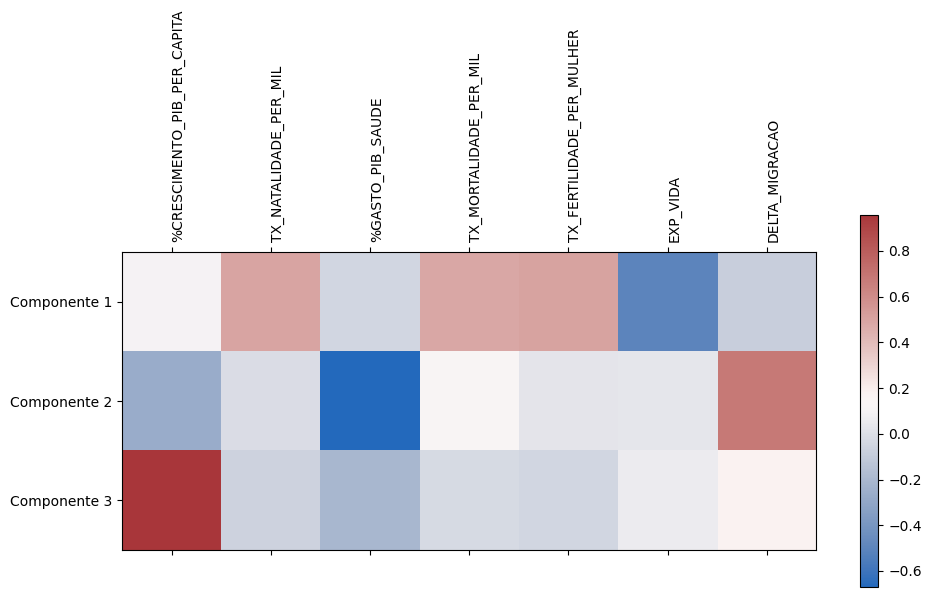

In [ ]:
plt.matshow(pca.components_, cmap='vlag')
plt.yticks([0, 1, 2], ['Componente 1', 'Componente 2', 'Componente 3'])
plt.colorbar()
plt.xticks(range(len(X.columns)), X.columns, rotation=90, ha='left')
plt.show()

In [ ]:
# Identifique os atributos mais relevantes com base nas cargas nas componentes principais
loadings = pd.DataFrame(pca.components_, columns=X.columns)
loadings_abs = abs(loadings)
top_features = loadings_abs.sum(axis=0).nlargest(3).index.tolist()

In [ ]:
dfPopulacaoBrasil= dfPopulacaoBrasil.reset_index(drop = True)
#dfPopulacaoBrasil['ANO']

In [ ]:
df_relevant = dfNormalizado[top_features + ['POP_TOTAL']]

In [ ]:
df_relevant = df_relevant.join(dfPopulacaoBrasil['ANO'], lsuffix='_left', rsuffix='_right')
df_relevant

,%CRESCIMENTO_PIB_PER_CAPITA,DELTA_MIGRACAO,%GASTO_PIB_SAUDE,POP_TOTAL,ANO
0,-0.025060,1.900711,-0.140587,-1.724752,1960
1,-0.025060,0.025440,-0.140587,-1.673616,1961
2,-0.025060,0.099449,-0.140587,-1.621755,1962
3,-0.025060,0.079385,-0.140587,-1.568818,1963
4,-0.025060,0.114294,-0.140587,-1.515173,1964
...,...,...,...,...,...
57,-0.187202,2.083013,-1.732081,1.369983,2017
58,-0.444602,2.508248,-1.070009,1.407958,2018
59,-0.150977,2.554256,-1.426287,1.444897,2019
60,-1.251711,2.102048,-0.140587,1.477199,2020


In [ ]:
pesos = explained_variance[0:3]

In [ ]:
indice = np.dot(df_relevant[['%CRESCIMENTO_PIB_PER_CAPITA','DELTA_MIGRACAO','%GASTO_PIB_SAUDE']], pesos)

In [ ]:
indice_norm = (indice - indice.min()) / (indice.max() - indice.min())
indice_norm

array([0.53444968, 0.42776436, 0.43197475, 0.4308333 , 0.43281933,
       0.44838353, 0.41242804, 0.42643268, 0.41433253, 0.41645027,
       0.41893176, 0.60159941, 0.62702859, 0.67651902, 0.46877411,
       0.42365308, 0.5773355 , 0.49613135, 0.41826104, 0.47653299,
       0.47210399, 0.14301688, 0.26554842, 0.18011378, 0.45829916,
       1.        , 0.53445609, 0.37846601, 0.32064213, 0.18002316,
       0.        , 0.35348186, 0.33744704, 0.40354382, 0.50334963,
       0.45074455, 0.33455765, 0.38371784, 0.27486377, 0.22426487,
       0.54766041, 0.43788681, 0.50864463, 0.36843648, 0.54028773,
       0.39931939, 0.50286201, 0.56010225, 0.49220444, 0.46035392,
       0.5442193 , 0.52182942, 0.46368324, 0.51530265, 0.38524714,
       0.23446381, 0.41734506, 0.4722193 , 0.48207699, 0.51367364,
       0.37773089, 0.41572484])

In [ ]:
df_relevant.describe()

,%CRESCIMENTO_PIB_PER_CAPITA,DELTA_MIGRACAO,%GASTO_PIB_SAUDE,POP_TOTAL,ANO
count,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,62.000000
mean,4.700541e-18,9.401082e-18,5.210885e-16,-1.325105e-16,1990.500000
std,1.008163e+00,1.008163e+00,1.008163e+00,1.008163e+00,18.041619
min,-3.237999e+00,-1.565519e+00,-1.732081e+00,-1.724752e+00,1960.000000
25%,-3.380747e-01,-7.325669e-01,-1.405871e-01,-8.961869e-01,1975.250000
50%,-2.505974e-02,-1.861856e-01,-1.405871e-01,7.910055e-02,1990.500000
75%,3.907176e-01,2.821177e-01,-1.405871e-01,9.085550e-01,2005.750000
max,4.360833e+00,3.046775e+00,2.963772e+00,1.503023e+00,2021.000000
